In [1]:
import pandas as pd

In [4]:
# Load data from a CSV file, parsing the 'Date' column as dates
data = pd.read_csv(r"C:\Users\pranav.nair2\Downloads\AMZN.csv", parse_dates=['Date'])
data = data.set_index('Date')
# Set the 'Date' column as the index of the DataFrame
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500


In [7]:
#check for missing values
print(data.isnull().sum())
#Drop rows with missing values
data = data.dropna()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
#calculate 5-day moving average of closing price
data['MA_5'] = data['Close'].rolling(window=5).mean()

#calculate 10-day moving average of closing price
data['MA_10'] = data['Close'].rolling(window=10).mean()

#Function to calculate relative strength index(RSI)
def calculate_rsi(data, window):
    #calculate the difference in price from the previous day
    delta = data['Close'].diff()
    
    #seperate the positive gains from the negative losses
    gain = (delta.where(delta > 0,0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    #calculate relative stregnth
    rs = gain / loss
    
    rsi = 100 - (100 / (1 +rs))
    return rsi

#Apply the RSI function to the data with a 14-day window
data['RSI'] = calculate_rsi(data, 14)


In [15]:
#shift close column by one day to create target variable
data ['Target'] = data['Close'].shift(-1)

#Drop any rows with missing values after shifting
data = data.dropna()

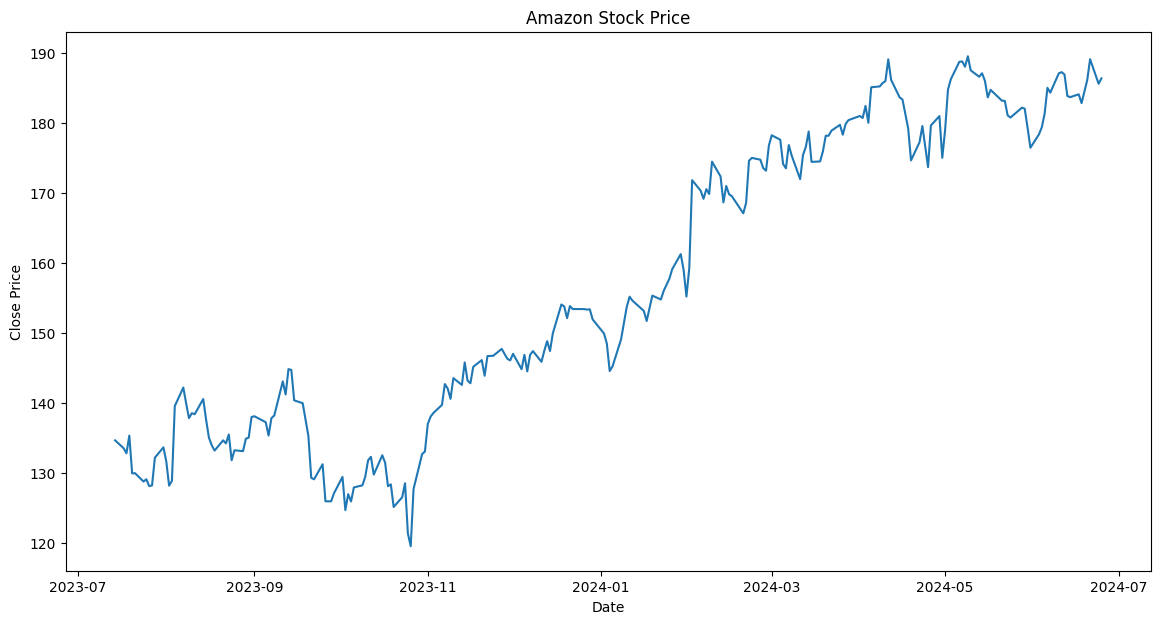

In [17]:
#Visualize stock price trends

import matplotlib.pyplot as plt 

#Creating the graph for closing price over time
plt.figure(figsize=(14,7))
plt.plot(data['Close'])
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

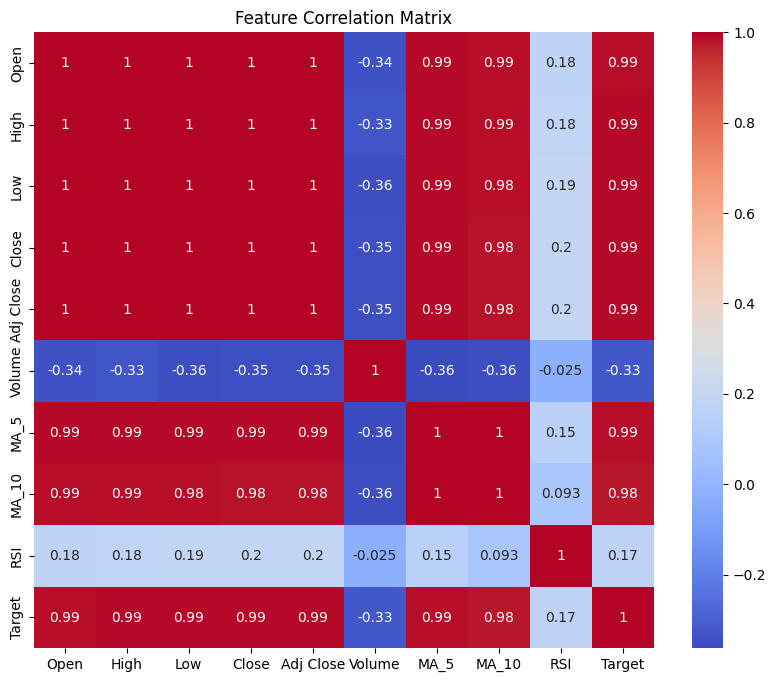

In [21]:
#Analyze feature correlations

import seaborn as sns

#plot the correlation matrix of the features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', "MA_10", 'RSI']
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 5.713754936706571


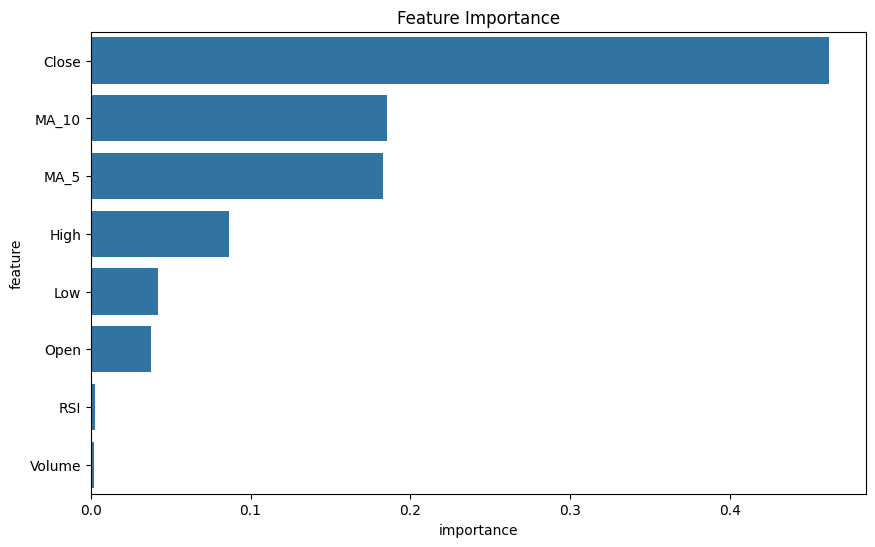

In [33]:
# Get the importance of each feature in the trained model
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_names = features
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

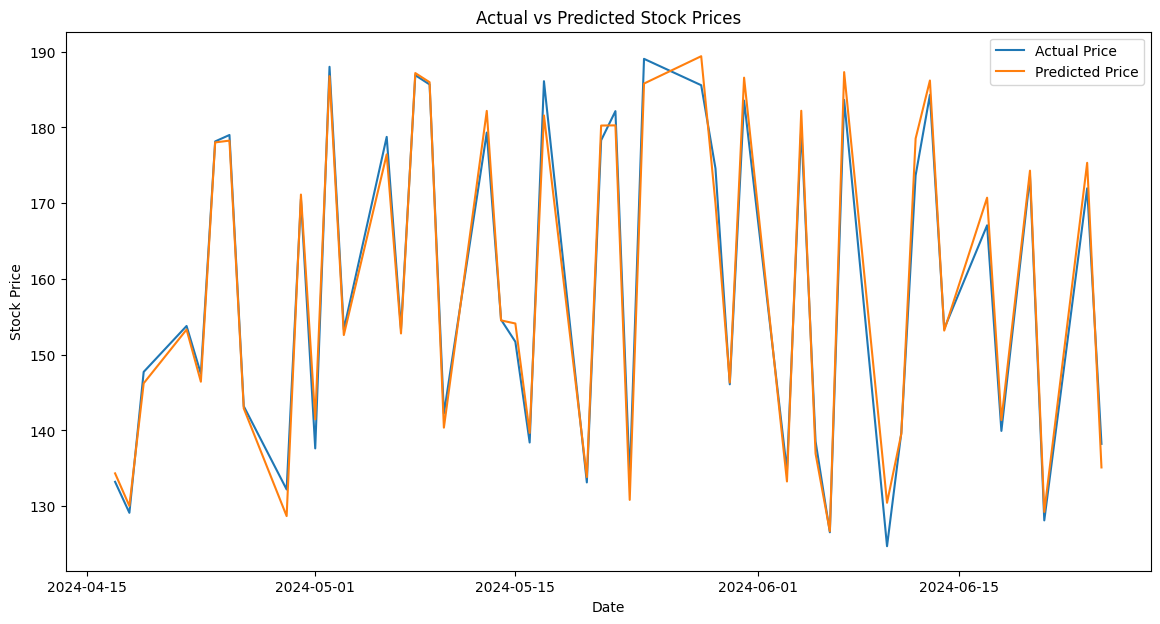

In [34]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [36]:
pip install Streamlit

   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   -------- ------------------------------- 1.9/8.6 MB 60.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.6/8.6 MB 71.8 MB/s eta 0:00:01
   ---------------------------------------- 8.6/8.6 MB 68.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   --------------------------------------- 857.8/857.8 kB 56.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/207.3 kB ? eta -:--:--
   ---------------------------------------- 207.3/207.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
   ---- ----------------------------------- 2.8/25.8 MB 90.8 MB/s eta 0:00:01
   -------- ------------------------------- 5.7/25.8 MB 72.9 MB/s eta 0:00:01
   ------------- -------------------------- 8.6/25.8 MB 60.6 MB/s eta 0:00:01
   ---------------- ----------------------- 10.6/25.8 MB 54.4 MB/s eta 0:00:01
   -------------------

In [37]:
# Example using Streamlit
import streamlit as st

# Set the title of the Streamlit app
st.title('Amazon Stock Price Prediction')

# Display a line chart of the closing price and moving averages
st.line_chart(data[['Close', 'MA_5', 'MA_10']])

# Display a bar chart of feature importance
st.write('Feature Importance:')
st.bar_chart(feature_importance_df.set_index('feature'))

2024-06-26 16:49:59.737 
  command:

    streamlit run C:\Users\pranav.nair2\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()